In [185]:
from hashlib import sha256
import os

In [186]:
import matplotlib.pyplot as plt
% matplotlib inline

In [187]:
import pickle

In [188]:
order = 'big' # big endian
size = 32

def str_to_bytes(string):
    return string.encode('utf-8')

def int_to_bytes(x):
    return x.to_bytes(blocksize, order)

def bytes_to_int(x_bytes):
    return int.from_bytes(x_bytes, order)

In [6]:
sha15_len = 15
sha16_len = 16
sha17_len = 17
sha18_len = 18
sha19_len = 19
sha20_len = 20

hexdigest_base = 16
start_idx_of_bin_num = 2

Не очень красивые функции, потому что сложно добиться представления в байтах 

In [7]:
def sha15(data):
    return str_to_bytes(format(int(sha256(data).hexdigest(), hexdigest_base), '0256b')[:sha15_len])

def sha16(data):
    return str_to_bytes(format(int(sha256(data).hexdigest(), hexdigest_base), '0256b')[:sha16_len])

def sha17(data):
    return str_to_bytes(format(int(sha256(data).hexdigest(), hexdigest_base), '0256b')[:sha17_len])

def sha18(data):
    return str_to_bytes(format(int(sha256(data).hexdigest(), hexdigest_base), '0256b')[:sha18_len])

def sha19(data):
    return str_to_bytes(format(int(sha256(data).hexdigest(), hexdigest_base), '0256b')[:sha19_len])

def sha20(data):
    return str_to_bytes(format(int(sha256(data).hexdigest(), hexdigest_base), '0256b')[:sha20_len])

In [189]:
byte_size = 8
int_to_get_first_bits = {
    0: 255,
    1: 128,
    2: 192,
    3: 224,
    4: 240,
    5: 248,
    6: 252,
    7: 254
}


def shaXX(data, x):
    bytes_amount = ceil(x / byte_size)
    sha256_digest = sha256(data).digest()[:bytes_amount]
    result = b''
    for i in range(bytes_amount - 1):
        result += sha256_digest[i].to_bytes(1, 'big')
    last_byte = sha256_digest[bytes_amount - 1]
    last_byte &= int_to_get_first_bits[x % byte_size]
    result += last_byte.to_bytes(1, 'big')
    return result


def sha15(data):
    return shaXX(data, 15)


def sha16(data):
    return shaXX(data, 16)


def sha17(data):
    return shaXX(data, 17)


def sha18(data):
    return shaXX(data, 18)


def sha19(data):
    return shaXX(data, 19)


def sha20(data):
    return shaXX(data, 20)

# Атака на основе парадокса дня рождений

### Нахождение коллизий

In [190]:
def generate_birthday_problem_collision(hash_function):
    S = {}
    while(True):
        x = os.urandom(32)
        h_x = hash_function(x)
        y = S.get(h_x)
        if y is None:
            S[h_x] = x
        elif x != y:
            return {'x': x, 
                    'y': y, 
                    'amount': len(S)}

Коллизии для хэш-функций `shaXX`, XX={15,...,20}

In [191]:
collision_sha15 = generate_birthday_problem_collision(sha15)
print('x =', collision_sha15['x'].hex())
print('y =', collision_sha15['y'].hex())
assert(sha15(collision_sha15['x']) == sha15(collision_sha15['y']))

x = 8a4ce695593778241ffd2cfc04f33040d4edfe768a473c4c295d4f6bb718f167
y = 4127b4c553b84a75446e96412ba5411ce0bac52b000d814a6b70a5246ab47c71


In [192]:
collision_sha16 = generate_birthday_problem_collision(sha16)
print('x =', collision_sha16['x'].hex())
print('y =', collision_sha16['y'].hex())
assert(sha16(collision_sha16['x']) == sha16(collision_sha16['y']))

x = 0b1b234a095b44fc065c80bc6f501e664de15628a15be599c0662774b60acfef
y = ffba097bc707d8c1486426792638d05247e70732c6142b47f5030c6a9c0d226e


In [193]:
collision_sha17 = generate_birthday_problem_collision(sha17)
print('x =', collision_sha17['x'].hex())
print('y =', collision_sha17['y'].hex())
assert(sha17(collision_sha17['x']) == sha17(collision_sha17['y']))

x = 29647f8d3415aacc6348e102833308c08e40b1e317db22a2c8ba0a88120a0821
y = 9b13a2cc1cf0ba46a1a5ad0696be89a8a8b502e747101c22db12339557e2dc85


In [194]:
collision_sha18 = generate_birthday_problem_collision(sha18)
print('x =', collision_sha18['x'].hex())
print('y =', collision_sha18['y'].hex())
assert(sha18(collision_sha18['x']) == sha18(collision_sha18['y']))

x = d857e3d875c81574c99510042ea6d5d497dfae8e44bb3dea551568b380e2edb8
y = 3ce5c29fca1078832262b86a6e28f7d09fd3c10f3474a1046856db06eb074eac


In [195]:
collision_sha19 = generate_birthday_problem_collision(sha19)
print('x =', collision_sha19['x'].hex())
print('y =', collision_sha19['y'].hex())
assert(sha19(collision_sha19['x']) == sha19(collision_sha19['y']))

x = 50c04c2d60c70173d17b15af58f9d145cd3d8fa17558371ac9dad5663aed8aa6
y = b3e5db2503149ca624106c4384427f595a3b2fb33fca2dd465e51daf667ed121


In [196]:
collision_sha20 = generate_birthday_problem_collision(sha20)
print('x =', collision_sha20['x'].hex())
print('y =', collision_sha20['y'].hex())
assert(sha20(collision_sha20['x']) == sha20(collision_sha20['y']))

x = cb0e9d58a542f1ae6c0a13ee0b3ad03d98da60c6bfaae7f39ecc3c220874d7b8
y = f086f00452132c58a7ab9b8e8642b4e5d5ed07179d54fbe9b62fbfb2fa3619cf


### Оценка метода

In [197]:
from datetime import datetime

In [198]:
collisions_amount = 100

In [199]:
def measuring_and_write_to_file(attack_function, hash_function, collisions_amount, filename):
    start_time = datetime.now()
    amount_stored_hashs = 0
    collisions = []
    while (collisions_amount > 0):
        collision = attack_function(hash_function)
        x, y = collision['x'].hex(), collision['y'].hex()
        collisions.append('[%s, %s]\n' % (str(x), str(y)))
        amount_stored_hashs += collision['amount']
        collisions_amount -= 1
    execution_time = datetime.now() - start_time
#     with open(filename, 'w') as file:
#         for col in collisions:
#             file.write(col)
    return (execution_time.total_seconds(), amount_stored_hashs)

In [200]:
results_birthday_sha15 = measuring_and_write_to_file(generate_birthday_problem_collision, sha15, collisions_amount, 'bd_collisions/sha15.txt')
results_birthday_sha16 = measuring_and_write_to_file(generate_birthday_problem_collision, sha16, collisions_amount, 'bd_collisions/sha16.txt')
results_birthday_sha17 = measuring_and_write_to_file(generate_birthday_problem_collision, sha17, collisions_amount, 'bd_collisions/sha17.txt')
results_birthday_sha18 = measuring_and_write_to_file(generate_birthday_problem_collision, sha18, collisions_amount, 'bd_collisions/sha18.txt')
results_birthday_sha19 = measuring_and_write_to_file(generate_birthday_problem_collision, sha19, collisions_amount, 'bd_collisions/sha19.txt')
results_birthday_sha20 = measuring_and_write_to_file(generate_birthday_problem_collision, sha20, collisions_amount, 'bd_collisions/sha20.txt')

In [201]:
results_birthday = [results_birthday_sha15, results_birthday_sha16, results_birthday_sha17, results_birthday_sha18, 
                   results_birthday_sha19, results_birthday_sha20]

In [202]:
execution_time = [result[0] / collisions_amount for result in results_birthday]

In [203]:
sha_lens = [sha15_len, sha16_len, sha17_len, sha18_len, sha19_len, sha20_len]
zip_amount_and_size =  zip([result[1] for result in results_birthday], sha_lens)

# умножаются друг на друга соответствующие значения кол-ва хранимых хэшей и длина этих хэшей в байтах
used_storage = [(amount * size) / collisions_amount for amount, size in zip_amount_and_size]

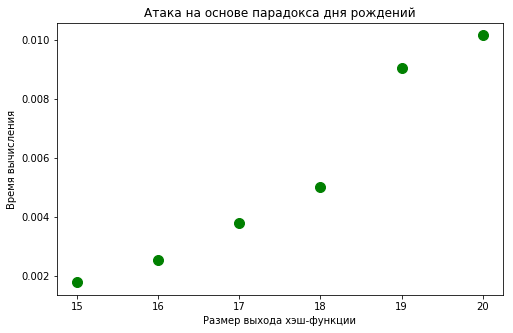

In [204]:
plt.figure(figsize=(8, 5))
plt.plot(sha_lens, execution_time, 'go', ms=10)
plt.title('Атака на основе парадокса дня рождений')
plt.xlabel('Размер выхода хэш-функции')
plt.ylabel('Время вычисления')

plt.savefig('plots/birthday_time_size_plot')

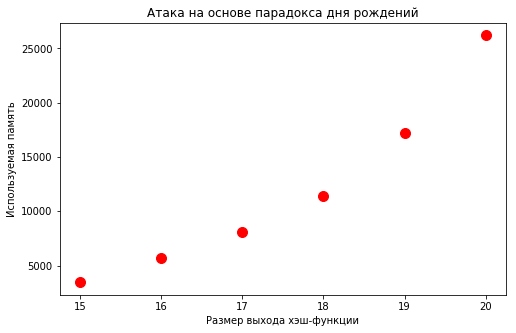

In [205]:
plt.figure(figsize=(8, 5))
plt.plot(sha_lens, used_storage, 'ro', ms=10)
plt.title('Атака на основе парадокса дня рождений')
plt.xlabel('Размер выхода хэш-функции')
plt.ylabel('Используемая память')

plt.savefig('plots/birthday_storage_size_plot')

# Атака на основе Ро-метода Полларда

### Нахождение коллизий

Нахождение коллизий происходит в файле `pollard.py`

In [178]:
with open('pollard_collisions/results_sha15.pickle', 'rb') as file1:
    results_pollard_sha15 = pickle.load(file1)
    
with open('pollard_collisions/results_sha16.pickle', 'rb') as file2:
    results_pollard_sha16 = pickle.load(file2)
    
with open('pollard_collisions/results_sha17.pickle', 'rb') as file:
    results_pollard_sha17 = pickle.load(file)
    
with open('pollard_collisions/results_sha18.pickle', 'rb') as file:
    results_pollard_sha18 = pickle.load(file)
    
with open('pollard_collisions/results_sha19.pickle', 'rb') as file:
    results_pollard_sha19 = pickle.load(file)
    
with open('pollard_collisions/results_sha20.pickle', 'rb') as file:
    results_pollard_sha20 = pickle.load(file)

In [206]:
results_pollard = [results_pollard_sha15, results_pollard_sha16, results_pollard_sha17, results_pollard_sha18,
                       results_pollard_sha19, results_pollard_sha20]

execution_time = [result[0] / collisions_amount for result in results_pollard]
sha_lens = [sha15_len, sha16_len, sha17_len, sha18_len, sha19_len, sha20_len]
zip_amount_and_size =  zip([result[1] for result in results_pollard], sha_lens)
used_storage = [(amount * size) / collisions_amount for amount, size in zip_amount_and_size]

In [207]:
used_storage

[1462.05, 2537.44, 8165.44, 8754.66, 9626.73, 15719.6]

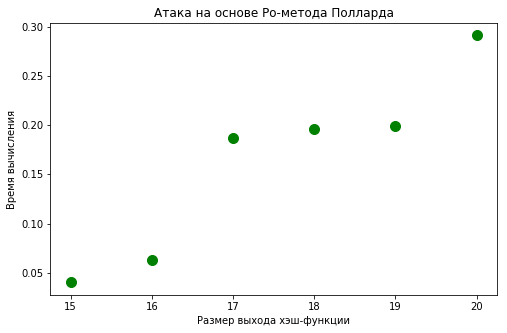

In [182]:
plt.figure(figsize=(8, 5))
plt.plot(sha_lens, execution_time, 'go', ms=10)
plt.title('Атака на основе Ро-метода Полларда')
plt.xlabel('Размер выхода хэш-функции')
plt.ylabel('Время вычисления')

plt.savefig('plots/pollard_time_size_plot')

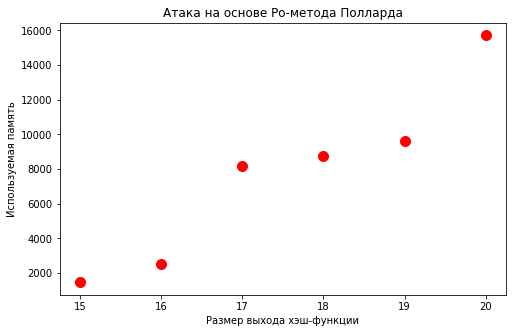

In [208]:
plt.figure(figsize=(8, 5))
plt.plot(sha_lens, used_storage, 'ro', ms=10)
plt.title('Атака на основе Ро-метода Полларда')
plt.xlabel('Размер выхода хэш-функции')
plt.ylabel('Используемая память')

plt.savefig('plots/pollard_storage_size_plot')